### Import required packages

In [16]:
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
import wordcloud
import nltk
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Open the corresponding dataset based on the file encoding type and extension

In [17]:
#Open corresponding file
filename = "tweets"
file_format = filename+'.csv'
filename = file_format
encoding = ['utf8','latin1','iso-8859-1','cp1252']
flag = False
encoding_list = len(encoding)
if file_format.endswith('.html'):
    dfs = pd.read_html(file_format)
    df  = pd.concat(dfs)
    df.to_csv(filename+".csv",index=False)
if file_format.endswith('.json'):
    df = pd.read_json(filename)
if 'parsed.csv' in filename:
    df = pd.read_csv(file_format, index_col=0 )
    flag = True
if flag != True:
#Try all the possible encoding schemes to see which one applies to the dataset
    for encoding_type in range(0,encoding_list-1):
        try:
            if file_format.endswith('.csv'):
                df = pd.read_csv(file_format, index_col=None , encoding = 'latin1')
                break
        except Exception:
            pass
df = pd.read_csv(file_format, index_col=None , encoding = 'utf8')

### Display the top 5 contents of the dataset

In [1]:
df.head()

NameError: name 'df' is not defined

### List of available languages for stopwords and stemming operations

In [19]:
#Available languages for stopwords
stopwords_language = ['english','german','dutch','hungarian','swedish','kazakh','norwegian','finnish','arabic','indonesian','portuguese','turkish','azerbaijani','slovene','spanish','danish',
 'nepali','romanian','greek','tajik','russian','french','italian']
#Available languages for Snowball Stemmer
stemmer_language = ['danish','dutch','english','french','german','hungarian','italian','norwegian','porter','portuguese','romanian','russian'
,'spanish','swedish']

### Cleaning Nan Values from the dataset

In [20]:
#Replace all Nan values with '' on categorical columns
df1 = df.loc[:, df.dtypes == object]
df1.replace(np.nan,'',regex = True, inplace=True)

C:\Users\Karthik\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### Method to return the subset of dataset based on user choice

In [21]:
def selectRows(df1):
    try:
        choice = input("Do you want to plot values of the entire dataset? Type Yes or No(To select a subset of data)\n")
        choice.lower()
        if choice == 'yes' or choice == 'y':
            df2 = df1
            return df2
        elif choice == 'No' or choice == 'n':
            totalValues = df.shape
            choice = int(input("Select the range of values in the dataset to be plotted: \
                               \n1)Top 100 values \
                               \n2)50% of the dataset \
                               \n3)25% of the dataset \
                               \n4)Random 100 values in the dataset \
                               \n5)Random 50% data of the dataset\n"))
            if choice == 1:
                return df1.loc[0:100]
            elif choice == 2:
                total =  totalValues[0]/2
                return df1.loc[0:total]
            elif choice == 3:
                total = totalValues[0]/4
                return df1.loc[0:total]
            elif choice == 4:
                return df1.sample(n=100)
            elif choice == 5:
                total = totalValues[0]/2
                return df1.sample(n=total)
            else:
                print("Enter a valid option")
        else:
            print("Please enter a valid option")
    except ValueError as e:
        print("Value error {} occured".format(e))

### Plots wordclouds after stopwords removal and stemming based on user selected langauge.

In [22]:
def plotwordcloud(languageindex, toLower , word_tokens , columnLen , listIndex):
    try:
        columnLen = columnLen
        flag = True
        listIndex = listIndex
        word_tokens = word_tokens
        languageindex = languageindex
        language = []
        toLower = toLower
        #Language for stemmer can be chosen from the stemmer_language list listed above
        #Language for stopwords can be chosen from the stopwords_language list listed above
        if languageindex != 0:
            for index in range (0, len(languageindex)):
                language.append(stopwords_language[int(languageindex[index])])
            #Language for stopwords can be chosen from the stopwords_language list listed above
            stop_words = set(stopwords.words(language[0]))
            for index in range(1, len(language)):
                stop_words.update(set(stopwords.words(language[index])) ) 
        else:
            stop_words = set(stopwords.words('english'))
        #Updates the stopwords with characters from a-z
        stop_words.update([chr(x) for x in range(ord('a'), ord('z')+1)])
        if listIndex == 0:
            new_stopwords = ['https','www','com']
            stop_words = stop_words.union(new_stopwords)
        filtered_sentence = [] 
        stem_sentence = []
        if languageindex == 0:
            englishStemmer = SnowballStemmer('english')
        else:
            englishStemmer = SnowballStemmer(language[0])
        #Loop through all the values to match the stopwords and discard them.
        for word in word_tokens: 
            if word not in stop_words: 
                filtered_sentence.append(word)
        #Apply stemming operation on the list 'filtered_sentence'
        if flag == True:
            for word in filtered_sentence:
                stem_sentence.append(englishStemmer.stem(word))
        listToStr = ' '.join([str(elem) for elem in stem_sentence])
        # We plot the wordcloud after the stemming operation 
        for index in range(0,columnLen):
            if flag == True:
                wordcloud = WordCloud(width = 800, height = 400, 
                        background_color ='white', 
                        stopwords = stop_words, 
                min_font_size = 10, collocations=False).generate(''.join(listToStr))
            else:
                listToStr = ' '.join([str(elem) for elem in filtered_sentence])
                #In case the stemming language does not exist for the selected stopword language we do not perform stemming as
                #Porter stemmer only supports some languages.
                wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stop_words, 
                min_font_size = 10, collocations=False).generate(''.join(listToStr))
            # plot the WordCloud image                        
            plt.figure(figsize = (8, 8), facecolor = None) 
            plt.imshow(wordcloud, interpolation='bilinear') 
            plt.axis("off") 
            plt.tight_layout(pad = 0) 
            plt.show()  
    except ValueError as e:
        print("Value error {} occured".format(e))

### Selects user input column index and removes special characters, links and performs tokenizing operations

In [23]:
def textprocess(language_index):
    try:
    #Sets the language for stopwords and stemming operation
        language_index = language_index
        listIndex = 0
        listpresent = False
        word_dictionary = {}
        print("The index values and the categorical columns are listed below:")
        #Lists the categorical columns in a dataset
        for index,column in enumerate(df1.loc[:, df1.dtypes == object]):
            print(index,column)
        ColumnIndexToBePlotted = [] 
        for i in range(0, 1):
            Number = int( input("Enter the index you want to plot a word cloud\n"))
            if Number <= len(df1.loc[:, df1.dtypes == object].columns):
                ColumnIndexToBePlotted.append(Number)
                #Loops through the columns of type object
                columns_to_plot = [df1.loc[:, df1.dtypes == object].columns[i] for i in ColumnIndexToBePlotted] 
                #Invoke method to select the range of values to plot
                df2 = selectRows(df1)
                #Updates the values of the user selected column in a dictionary
                for index in range(0,len(columns_to_plot)):
                    word_dictionary.update(df2[columns_to_plot[index]])
                #Strip out the values from dictionary
                keys, values = zip(*word_dictionary.items())
                col = list(values)
                for val in range(0 ,len(df.columns)):
                    if type(df[df.columns[val]][1]) == list:
                        listpresent = True
                if listpresent != True:
                    for i in range(0,len(col)):
                        #Removes all the http links in the list.
                        link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
                        links         = re.findall(link_regex, str(col[i]))
                        for link in links:
                            col[i] = col[i].replace(link[0], ', ')
                else:
                    listIndex = 0
                #Select the type of tokenizer based on the column data which could be regular text, tweets or even HTML
                try:
                    tokenizerChoice = int(input("Choose the type of tokenizer to be applied on the selected column\n1. Word Tokenizer (Regular text)\n2. Tweet Tokenizer (Tweets)\n3. HTML tokenizer\n"))
                    if tokenizerChoice == 1:
                        #Removes all special characters from the dict values
                        removeSpecialChar = re.sub('[^a-zA-Z0-9]+', ' ', str(col))
                        toLower = removeSpecialChar.lower()
                        #Converts the values to lowercase for uniformity and in order to match the stopwords
                        word_tokens = word_tokenize(toLower)
                    elif tokenizerChoice == 2:
                        removeSpecialChar = re.sub('[^a-zA-Z0-9#]+', ' ', str(col))
                        tknr = TweetTokenizer()
                        toLower = removeSpecialChar.lower()
                        word_tokens = tknr.tokenize(toLower)
                    elif tokenizerChoice == 3:
                        removeSpecialChar = re.sub('[^a-zA-Z0-9]+', ' ', str(col))
                        toLower = removeSpecialChar.lower()
                        word_tokens = BeautifulSoup(toLower, 'html.parser')
                    else:
                        print("Please enter a valid option")
                    if tokenizerChoice <=3:
                        plotwordcloud(language_index,toLower,word_tokens ,len(columns_to_plot) , listIndex)
                except ValueError as e:
                    print("Value error {} occured".format(e))
            else:
                print("Enter a valid index")
    except ValueError as e:
        print("Value error {} occured".format(e))

### Selecting the language for wordclouds

In [14]:
#Plots the value count of the specified column indexes 
def wordcloudOfColumns(df):
    try:
        language_index = []
        languages = []
        count = 0
        choice = input("Do you want to compute the wordclouds of the columns? Type Yes or no\n")
        choice.lower()
        if choice == 'yes' or choice == 'y':
            language = input("Is the data you want to compute wordclouds in english? Press Yes or No\n")
            language.lower()
            if language == 'yes' or language == 'y':
                language_index = 0
                # Passes the user selected language to perform the stemming and stopword operations. 
                textprocess(language_index)
            else:
                print("The index and the available languages are listed below:\n")
                for index,language in enumerate(stopwords_language):
                    print(index,language)
                print("\n")
                
                while True:
                    choice = input("Enter the column index of the preferred languages or Press Enter to exit\n")
                    if choice.isnumeric():
                        language_index.append(choice)
                        count += 1
                    elif choice == '':
                        if count > 0:
                            for index in range (0, len(language_index)):
                                languages.append(stopwords_language[int(language_index[index])])
                            print("Done selecting Languages:", end =" ")
                            for val in languages:
                                print(val, end =" ")
                            print("\n")
                        else:
                            print("Exiting the function")
                        break
                textprocess(language_index)
        elif choice == 'no' or choice == 'n':
            pass
        else:
            print("Please enter a valid choice")
    except ValueError as e:
        print("Value error {} occured".format(e))

### Displays the output of the wordcloud

Do you want to compute the wordclouds of the columns? Type Yes or no
y
Is the data you want to compute wordclouds in english? Press Yes or No
y
The index values and the categorical columns are listed below:
0 handle
1 text
2 original_author
3 time
4 in_reply_to_screen_name
5 lang
6 place_id
7 place_full_name
8 place_name
9 place_type
10 place_country_code
11 place_country
12 place_contained_within
13 place_attributes
14 place_bounding_box
15 source_url
16 entities
17 extended_entities
Enter the index you want to plot a word cloud
1
Do you want to plot values of the entire dataset? Type Yes or No(To select a subset of data)
n
Select the range of values in the dataset to be plotted:                                
1)Top 100 values                                
2)50% of the dataset                                
3)25% of the dataset                                
4)Random 100 values in the dataset                                
5)Random 50% data of the dataset
3
Choose the type of to

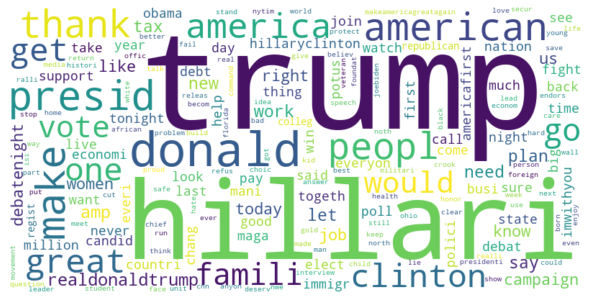

In [15]:
ls = wordcloudOfColumns(df)